In [39]:
!pip install pycountry

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py
from wordcloud import WordCloud
import pycountry

In [41]:
sm_data= pd.read_csv('Social Media Engagement Dataset.csv')
df = pd.DataFrame(sm_data)
df['country_name'] = df['location'].apply(lambda x: x.split(",")[-1].strip())

# Convert country names to ISO Alpha-3 codes
def get_iso_alpha_3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

df['iso_code'] = df['country_name'].apply(get_iso_alpha_3)

In [42]:
sm_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_id                  12000 non-null  object 
 1   timestamp                12000 non-null  object 
 2   day_of_week              12000 non-null  object 
 3   platform                 12000 non-null  object 
 4   user_id                  12000 non-null  object 
 5   location                 12000 non-null  object 
 6   language                 12000 non-null  object 
 7   text_content             12000 non-null  object 
 8   hashtags                 12000 non-null  object 
 9   mentions                 8059 non-null   object 
 10  keywords                 12000 non-null  object 
 11  topic_category           12000 non-null  object 
 12  sentiment_score          12000 non-null  float64
 13  sentiment_label          12000 non-null  object 
 14  emotion_type          

In [43]:
sm_data.shape

(12000, 28)

In [44]:
sm_data

,post_id,timestamp,day_of_week,platform,user_id,location,language,text_content,hashtags,mentions,...,comments_count,impressions,engagement_rate,brand_name,product_name,campaign_name,campaign_phase,user_past_sentiment_avg,user_engagement_growth,buzz_change_rate
0,kcqbs6hxybia,2024-12-09 11:26:15,Monday,Instagram,user_52nwb0a6,"Melbourne, Australia",pt,Just tried the Chromebook from Google. Best pu...,#Food,NaN,...,701,18991,0.19319,Google,Chromebook,BlackFriday,Launch,0.0953,-0.3672,19.1
1,vkmervg4ioos,2024-07-28 19:59:26,Sunday,Twitter,user_ucryct98,"Tokyo, Japan",ru,Just saw an ad for Microsoft Surface Laptop du...,"#MustHave, #Food","@CustomerService, @BrandCEO",...,359,52764,0.05086,Microsoft,Surface Laptop,PowerRelease,Post-Launch,0.1369,-0.4510,-42.6
2,memhx4o1x6yu,2024-11-23 14:00:12,Saturday,Reddit,user_7rrev126,"Beijing, China",ru,What's your opinion about Nike's Epic React? ...,"#Promo, #Food, #Trending",NaN,...,643,8887,0.45425,Nike,Epic React,BlackFriday,Post-Launch,0.2855,-0.4112,17.4
3,bhyo6piijqt9,2024-09-16 04:35:25,Monday,YouTube,user_4mxuq0ax,"Lagos, Nigeria",en,Bummed out with my new Diet Pepsi from Pepsi! ...,"#Reviews, #Sustainable","@StyleGuide, @BrandSupport",...,743,6696,0.42293,Pepsi,Diet Pepsi,LaunchWave,Launch,-0.2094,-0.0167,-5.5
4,c9dkiomowakt,2024-09-05 21:03:01,Thursday,Twitter,user_l1vpox2k,"Berlin, Germany",hi,Just tried the Corolla from Toyota. Absolutely...,"#Health, #Travel","@BrandSupport, @InfluencerName",...,703,47315,0.08773,Toyota,Corolla,LocalTouchpoints,Launch,0.6867,0.0807,38.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,vpqni584supc,2025-01-10 07:55:51,Friday,Instagram,user_ysobum87,"Seoul, South Korea",ar,Comparing Toyota Camry to the competition. Bes...,"#Food, #BestValue","@IndustryExpert, @InfluencerName",...,41,220,22.08636,Toyota,Camry,CustomerFirst,Pre-Launch,-0.0299,0.0205,-6.0
11996,h8rvov0xym5z,2024-12-04 18:50:38,Wednesday,Reddit,user_2jzngfsp,"New York, USA",pt,My two days review of Apple AirPods Pro: Highl...,#TrendAlert,"@TrendSetter, @NewsOutlet",...,176,17346,0.20546,Apple,AirPods Pro,FallCollection,Launch,0.5936,-0.0928,-92.1
11997,14zrjm51ea3y,2024-10-24 19:11:24,Thursday,Facebook,user_0sidyfyh,"Lyon, France",ja,Just unboxed my new Dri-FIT from Nike. Best pu...,#Food,"@RetailSupport, @TechHelp",...,330,90913,0.05342,Nike,Dri-FIT,LocalTouchpoints,Post-Launch,0.0899,-0.1186,-96.8
11998,7bdmnv3rdj8n,2024-11-12 03:07:19,Tuesday,Reddit,user_njyhr041,"Manchester, UK",fr,Comparing Toyota Camry to the competition. Doe...,"#SpecialOffer, #Promo, #Fashion","@BrandSupport, @TechHelp",...,221,78790,0.04732,Toyota,Camry,CyberMonday,Post-Launch,-0.3666,-0.4527,15.9


In [45]:
sm_data.day_of_week.value_counts()

,count
day_of_week,
Wednesday,1771
Friday,1723
Monday,1720
Thursday,1718
Sunday,1716
Tuesday,1677
Saturday,1675


In [46]:
sm_data.platform.value_counts()

,count
platform,
YouTube,2436
Facebook,2431
Twitter,2406
Reddit,2372
Instagram,2355


In [47]:
sm_data.location.value_counts()

,count
location,
"Milan, Italy",403
"Mexico City, Mexico",399
"Dubai, UAE",384
"São Paulo, Brazil",383
"Shanghai, China",383
"Beijing, China",382
"Barcelona, Spain",380
"Munich, Germany",379
"Mumbai, India",379


In [48]:
sm_data.hashtags.value_counts()

,count
hashtags,
#NewRelease,153
#Fitness,149
#Food,148
#Lifestyle,148
#Travel,148
...,...
"#NewRelease, #Travel, #Trending",1
"#Affordable, #Sale, #BestValue",1
"#TrendAlert, #Tech, #Travel",1


In [49]:
sm_data.language.value_counts()

,count
language,
ja,1234
ru,1217
es,1214
ar,1211
zh,1207
fr,1197
en,1197
de,1195
hi,1181


<Axes: xlabel='day_of_week', ylabel='engagement_rate'>

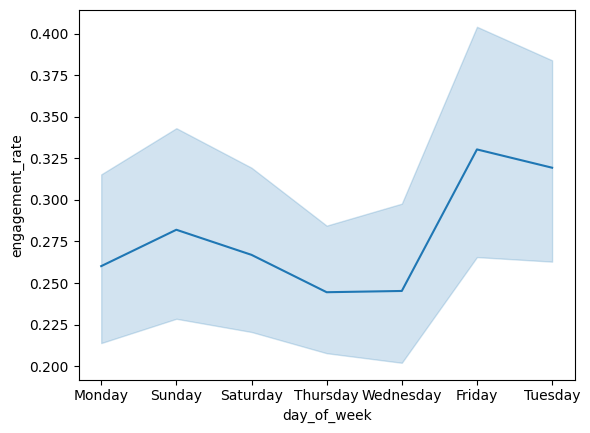

In [50]:
sns.lineplot(data=sm_data, x='day_of_week', y='engagement_rate')

In [51]:
sm_data.mentions.value_counts().head(5)

,count
mentions,
@RetailSupport,286
@BrandCEO,285
@InfluencerName,284
@CompetitorBrand,281
@IndustryExpert,277


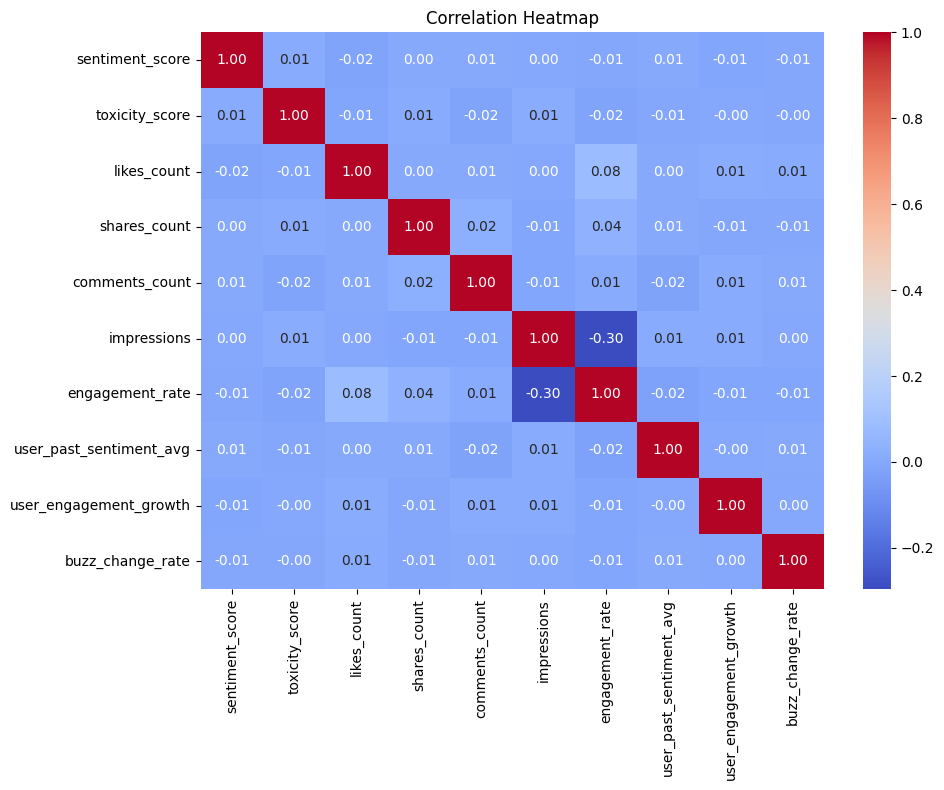

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


<Axes: xlabel='mentions', ylabel='engagement_rate'>

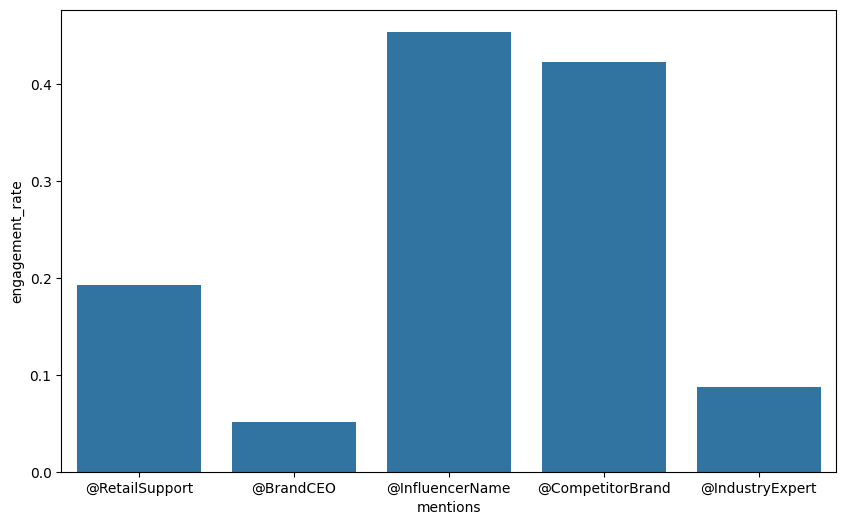

In [53]:
plt.figure(figsize=(10, 6))
top_5_sm_data = df['mentions'].value_counts().head(5)
sns.barplot(x=top_5_sm_data.index,y=df['engagement_rate'].head(5))

Text(0, 0.5, 'Engagement Rate')

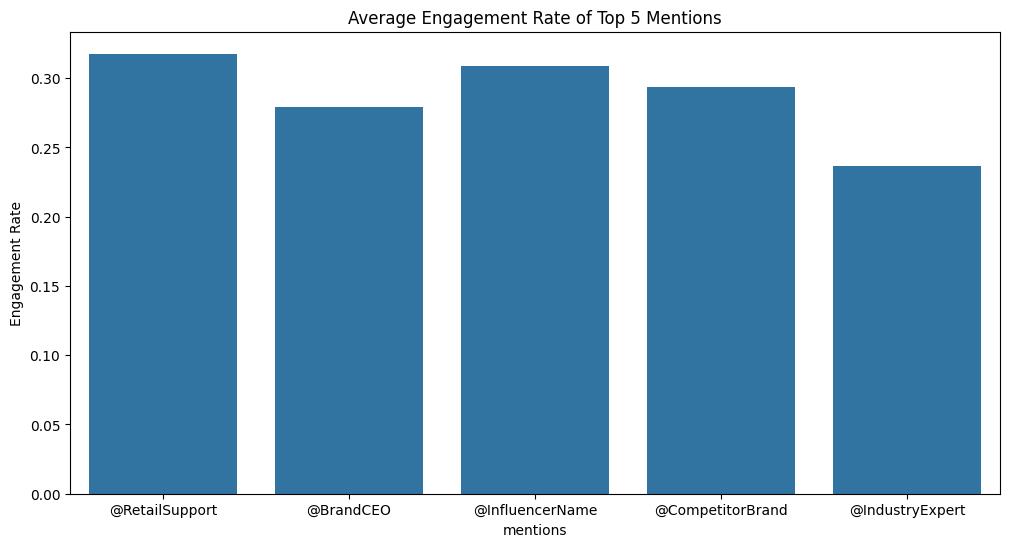

In [54]:
top_mentions = df[df['mentions'].isin(top_5_sm_data.index)]
avg_engagement = top_mentions.groupby('mentions')['engagement_rate'].mean().loc[top_5_sm_data.index]
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_engagement.index, y=avg_engagement.values)
plt.title("Average Engagement Rate of Top 5 Mentions")
plt.ylabel("Engagement Rate")


<Axes: xlabel='platform', ylabel='engagement_rate'>

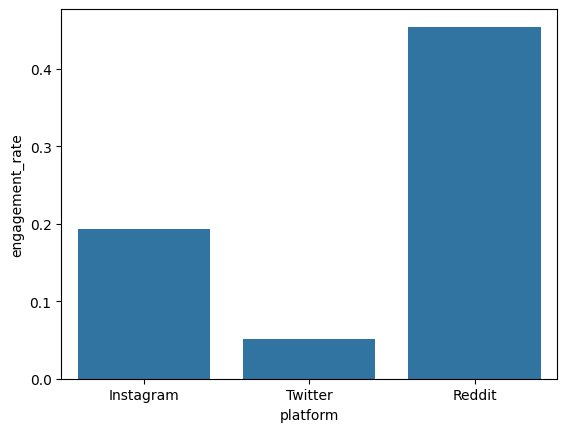

In [55]:
sns.barplot(x=df['platform'].head(3),y=df['engagement_rate'].head(3))

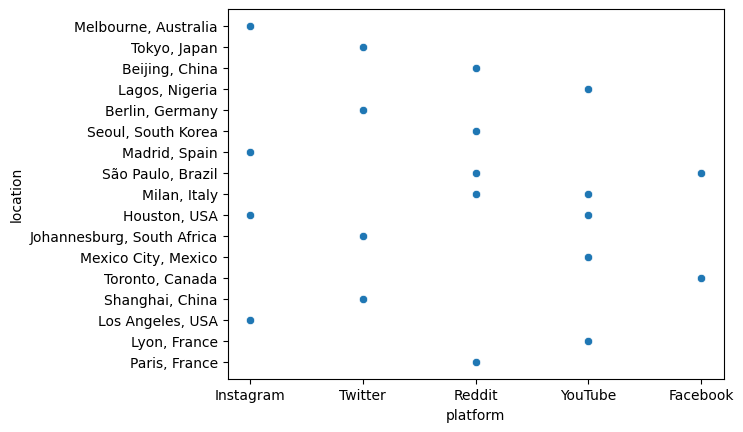

In [56]:
sns.scatterplot(y=df['location'],x=df['platform'].head(20))
plt.show()

In [59]:
fig = py.choropleth(
    df,
    locations="iso_code",
    color="platform",
    hover_name="country_name",
    color_discrete_sequence=py.colors.qualitative.Set1,
    title="Most Used Platform by Country",
    projection="natural earth"
)

fig.show()


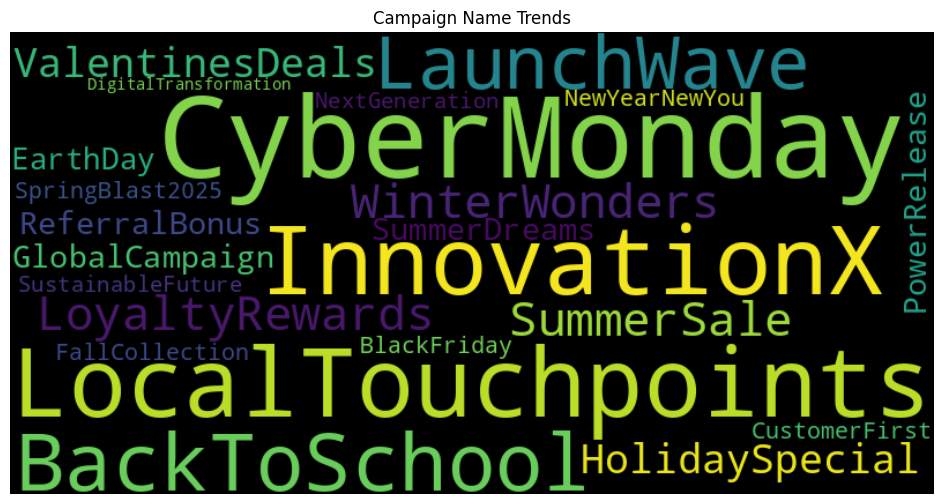

In [60]:
hashtags_text = " ".join(df['campaign_name'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(hashtags_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Campaign Name Trends")
plt.show()

In [61]:
def sentiment_to_emoji(score):
    if score >= 0.6:
        return "😄"   # Positive
    elif score >= 0.2:
        return "🙂"   # Mildly Positive
    elif score >= -0.2:
        return "😐"   # Neutral
    elif score >= -0.6:
        return "😕"   # Mildly Negative
    else:
        return "😠"   # Negative

df["emoji"] = df["sentiment_score"].apply(sentiment_to_emoji)

df2 = df[['topic_category','location','sentiment_score', 'emoji']]

df2

,topic_category,location,sentiment_score,emoji
0,Pricing,"Melbourne, Australia",0.9826,😄
1,Delivery,"Tokyo, Japan",-0.3793,😕
2,Product,"Beijing, China",-0.3596,😕
3,Delivery,"Lagos, Nigeria",-0.7282,😠
4,Product,"Berlin, Germany",0.5460,🙂
...,...,...,...,...
11995,Support,"Seoul, South Korea",0.2728,🙂
11996,Product,"New York, USA",0.9661,😄
11997,Returns,"Lyon, France",0.8055,😄
11998,Pricing,"Manchester, UK",0.1984,😐


In [62]:
df['emoji'].value_counts()

,count
emoji,
😄,2454
😠,2430
😕,2424
🙂,2385
😐,2307


Text(0.5, 1.0, 'Campaign Performance')

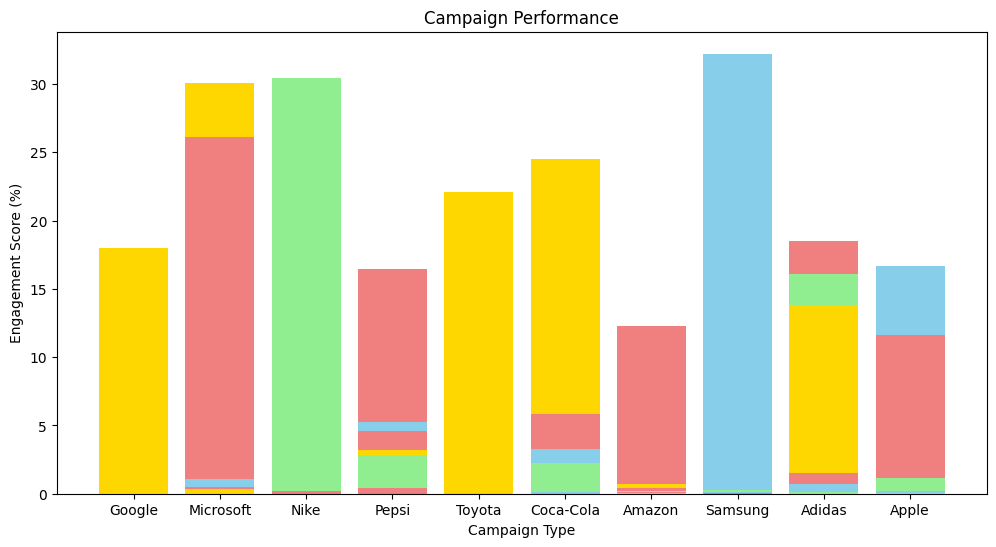

In [63]:
plt.figure(figsize=(12, 6))
bars = plt.bar(df['brand_name'],df['engagement_rate'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

plt.xlabel('Campaign Type')
plt.ylabel('Engagement Score (%)')
plt.title('Campaign Performance')